**Step 1: Importing the libraries**

In [11]:
import pandas as pd
import numpy as np
# seting seed for reproducibility
np.random.seed(0) 


**Step 2: Importing dataset**

In [6]:
from google.colab import files
upload_file = files.upload()

Saving Data.csv to Data.csv


In [14]:
df = pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
# look at a few rows of the nfl_data file. I can see a handful of missing data already!
df.sample(5)

,Country,Age,Salary,Purchased
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [16]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [17]:
# For knowing how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# For knowing the percent of data that is missing
(total_missing/total_cells) * 100

5.0

In [18]:
# for removing all the rows that contain a missing value
df.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [19]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Country,Purchased
0,France,No
1,Spain,Yes
2,Germany,No
3,Spain,No
4,Germany,Yes


In [20]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 4 

Columns with na's dropped: 2


In [22]:
# get a small subset of the NFL dataset
subset_df = df.loc[:, 'Age':'Salary'].head()
subset_df

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


In [23]:
# replace all NA's with 0
subset_df.fillna(0)

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,0.0


In [24]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
subset_df.fillna(method = 'bfill', axis=0).fillna(0)

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,0.0


**Step 4: Encoding categorical data**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
train_org = pd.read_csv('Data.csv')
train = train_org[['Country','Age','Salary','Purchased']]
train_x = train.drop(['Age'], axis=1)
train_y = train['Salary']
test_x = pd.read_csv('Data.csv')

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [33]:
! pip install skimpy


In [34]:
from skimpy import skim
skim(train)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10     │ │ object      │ 2     │                                    │
│ │ Number of columns │ 4      │ │ float64     │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃        ┃ missing ┃ complete ┃ mean  ┃ sd    ┃ p0    ┃ p25   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┃        ┃         ┃ rate     ┃       ┃       ┃       ┃       ┃       ┃       ┃        ┃  │
│ ┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Age    │       1 │      0.9 │    39 │   7.7 │    27 │    35 │    44 │    50 │ ▅ █▃▃▅ │  │
│ │ Salary │       1 │      0.9 │ 64000 │ 12000 │ 48000 │ 54000 │ 72000 │ 83000 │ ██▄▄▄█ │  │
│ └────────┴─────────┴──────────┴───────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

Text(0.5, 20, 'Age and Salary')

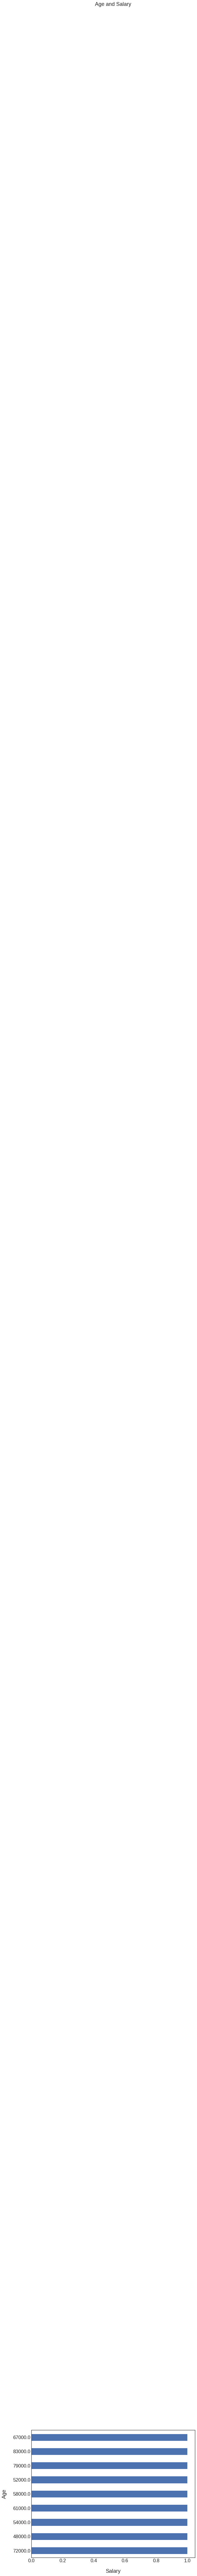

In [53]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
train_x['Salary'].value_counts().sort_values().plot(kind='barh',figsize=(10, 8))
plt.xlabel("Salary", labelpad=20)
plt.ylabel("Age", labelpad=20)
plt.title("Age and Salary", y=20)

In [56]:
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()

def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

cat_cols = ['Salary']
train.loc[:,'Age'].unique()

array([44., 27., 30., 38., 40., 35., nan, 48., 50., 37.])

In [59]:
train_x, test_x = load_data()

from sklearn.preprocessing import OneHotEncoder

# Encoding by OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto')
ohe.fit(train_x[cat_cols])

# Create column names
columns = []
for i, c in enumerate(cat_cols):
    columns += [f'{c}_{v}' for v in ohe.categories_[i]]

print(columns)
# Convert the created dummy variable to a data frame
dummy_vals_train = pd.DataFrame(ohe.transform(train_x[cat_cols]), columns=columns)
dummy_vals_test = pd.DataFrame(ohe.transform(test_x[cat_cols]), columns=columns)

# Combine with the rest of the variables
train_x = pd.concat([train_x.drop(cat_cols, axis=1), dummy_vals_train], axis=1)
test_x = pd.concat([test_x.drop(cat_cols, axis=1), dummy_vals_test], axis=1)

['Salary_48000.0', 'Salary_52000.0', 'Salary_54000.0', 'Salary_58000.0', 'Salary_61000.0', 'Salary_67000.0', 'Salary_72000.0', 'Salary_79000.0', 'Salary_83000.0', 'Salary_nan']


In [60]:
skim(train_x)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10     │ │ float64     │ 10    │                                    │
│ │ Number of columns │ 12     │ │ object      │ 2     │                                    │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃              ┃ missing ┃ complete     ┃ mean ┃ sd   ┃ p0 ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃              ┃         ┃ rate         ┃      ┃      ┃    ┃     ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Salary_48000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_52000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_54000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_58000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_61000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_67000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_72000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_79000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_83000 │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ .0           │         │              │      │      │    │     │     │      │        │  │
│ │ Salary_nan   │       0 │            1 │  0.1 │ 0.32 │  0 │   0 │   0 │    1 │ █    ▁ │  │
│ └──────────────┴─────────┴──────────────┴──────┴──────┴────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

**Step 5: Creating a dummy variable**

In [65]:
train_x, test_x = load_data()
test_x = test_x.loc[:,['Age','Salary']]

combined = pd.concat([train_x,test_x])
combined = pd.get_dummies(combined,columns=cat_cols)

#respliting train and test dataset
train_x = combined.iloc[:train_x.shape[0],:].reset_index(drop=True)
test_X = combined.iloc[train_x.shape[0]:,:].reset_index(drop=True)

In [66]:
skim(train_x)

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 10     │ │ uint8       │ 9     │                                    │
│ │ Number of columns │ 12     │ │ object      │ 2     │                                    │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃             ┃ missing ┃ complete     ┃ mean ┃ sd   ┃ p0  ┃ p25 ┃ p75 ┃ p100 ┃ hist   ┃  │
│ ┃             ┃         ┃ rate         ┃      ┃      ┃     ┃     ┃     ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Age         │      10 │            0 │  nan │  nan │ nan │ nan │ nan │  nan │        │  │
│ │ Salary_4800 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_5200 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_5400 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_5800 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_6100 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_6700 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_7200 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_7900 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ │ Salary_8300 │       0 │            1 │  0.1 │ 0.32 │   0 │   0 │   0 │    1 │ █    ▁ │  │
│ │ 0.0         │         │              │      │      │     │     │     │      │        │  │
│ └─────────────┴─────────┴──────────────┴──────┴──────┴─────┴─────┴─────┴──────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

**Step 6: Splitting the datasets into training sets and Test sets**

**Step 7: Feature Scaling**